In [1]:
import sklearn

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Part 1


### Exploring Bank Dataset
Source: https://www.kaggle.com/itsmesunil/bank-loan-modelling

In [2]:
bank_data = pd.read_csv('./datasets/bank_data.csv')
bank_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
1,2,38,14,130,95010,4,4.7,3,134,1,0,0,0,0
2,3,46,21,193,91604,2,8.1,3,0,1,0,0,0,0
3,4,38,13,119,94104,1,3.3,2,0,1,0,1,1,1
4,5,42,18,141,94114,3,5.0,3,0,1,1,1,1,0


In [3]:
bank_data = bank_data.drop(['ID', 'Experience', 'ZIP Code', 'CCAvg', 'Personal Loan'], axis=1)

In [4]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 480 non-null    int64
 1   Income              480 non-null    int64
 2   Family              480 non-null    int64
 3   Education           480 non-null    int64
 4   Mortgage            480 non-null    int64
 5   Securities Account  480 non-null    int64
 6   CD Account          480 non-null    int64
 7   Online              480 non-null    int64
 8   CreditCard          480 non-null    int64
dtypes: int64(9)
memory usage: 33.9 KB


In [5]:
bank_data.describe()

,Age,Income,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.00000,480.000000
mean,45.066667,144.745833,2.612500,2.233333,100.845833,0.125000,0.291667,0.60625,0.297917
std,11.590964,31.584429,1.115393,0.753373,160.847862,0.331064,0.455004,0.48909,0.457820
min,26.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,35.000000,122.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,45.000000,142.500000,3.000000,2.000000,0.000000,0.000000,0.000000,1.00000,0.000000
75%,55.000000,172.000000,4.000000,3.000000,192.500000,0.000000,1.000000,1.00000,1.000000
max,65.000000,203.000000,4.000000,3.000000,617.000000,1.000000,1.000000,1.00000,1.000000


In [6]:
bank_data.to_csv('datasets/bank_data_processed.csv', index=False)

In [7]:
bank_data_corr = bank_data.corr()
bank_data_corr

,Age,Income,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.021260,-0.001712,-0.009196,0.041622,-0.008705,0.053308,0.028577,0.026542
Income,0.021260,1.000000,-0.020876,0.122170,0.189672,-0.053058,0.069669,0.075136,0.013477
Family,-0.001712,-0.020876,1.000000,-0.239996,0.070556,-0.106005,-0.003085,-0.039178,0.050746
Education,-0.009196,0.122170,-0.239996,1.000000,-0.026044,-0.041852,-0.071054,0.000567,-0.038536
Mortgage,0.041622,0.189672,0.070556,-0.026044,1.000000,-0.016809,0.084738,0.063899,0.039181
Securities Account,-0.008705,-0.053058,-0.106005,-0.041852,-0.016809,1.000000,0.464282,0.059631,-0.012052
CD Account,0.053308,0.069669,-0.003085,-0.071054,0.084738,0.464282,1.000000,0.385804,0.514046
Online,0.028577,0.075136,-0.039178,0.000567,0.063899,0.059631,0.385804,1.000000,-0.043762
CreditCard,0.026542,0.013477,0.050746,-0.038536,0.039181,-0.012052,0.514046,-0.043762,1.000000


<AxesSubplot: >

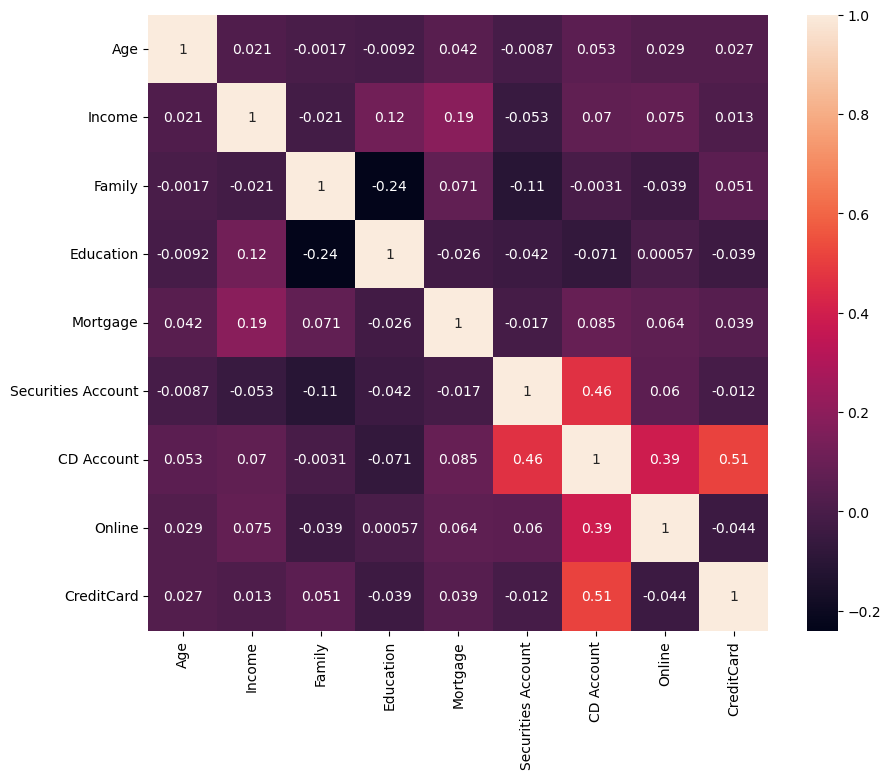

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(bank_data_corr, annot=True)

In [9]:
X = bank_data.drop('CreditCard', axis=1)
Y = bank_data['CreditCard']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

### Trying three random classifiers

In [11]:
log_clf = LogisticRegression(C=1, solver='liblinear')
svc_clf = SVC(C=1, kernel='linear', gamma='auto')
naive_clf = GaussianNB()

In [12]:
for clf in (log_clf, svc_clf, naive_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.90625
SVC 0.8854166666666666
GaussianNB 0.8125


### Hard Voting

In [13]:
voting_clf_hard = VotingClassifier(estimators=[('lr', log_clf), ('svc', svc_clf), ('naive', naive_clf)], voting='hard')

In [14]:
voting_clf_hard.fit(x_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1, solver='liblinear')),
                             ('svc', SVC(C=1, gamma='auto', kernel='linear')),
                             ('naive', GaussianNB())])

In [15]:
y_pred = voting_clf_hard.predict(x_test)

In [16]:
accuracy_score(y_test, y_pred)

0.90625

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94        66
           1       0.96      0.73      0.83        30

    accuracy                           0.91        96
   macro avg       0.92      0.86      0.88        96
weighted avg       0.91      0.91      0.90        96



In [18]:
print(confusion_matrix(y_test, y_pred))

[[65  1]
 [ 8 22]]


In [19]:
for clf_hard in (log_clf, svc_clf, naive_clf, voting_clf_hard):
    clf_hard.fit(x_train, y_train)
    y_pred = clf_hard.predict(x_test)
    print(clf_hard.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.90625
SVC 0.8854166666666666
GaussianNB 0.8125
VotingClassifier 0.90625


### Soft Voting

In [20]:
svc_clf_soft = SVC(C=1, kernel='linear', gamma='auto', probability=True)

In [21]:
voting_clf_soft = VotingClassifier(estimators=[('lr', log_clf), ('svc', svc_clf_soft), ('naive', naive_clf)], voting='soft', weights = [0.34, 0.33, 0.33])

In [22]:
for clf_soft in (log_clf, svc_clf_soft, naive_clf, voting_clf_soft):
    clf_soft.fit(x_train, y_train)
    y_pred = clf_soft.predict(x_test)
    print(clf_soft.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.90625
SVC 0.8854166666666666
GaussianNB 0.8125
VotingClassifier 0.90625


# Part II

### Exploring Concrete Dataset
Source: https://www.kaggle.com/maajdl/yeh-concret-data

In [23]:
concrete_data = pd.read_csv('datasets/concrete_data.csv')
concrete_data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [24]:
concrete_data.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [25]:
concrete_data_corr = concrete_data.corr()
concrete_data_corr

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
flyash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseaggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineaggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
csMPa,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


<AxesSubplot: >

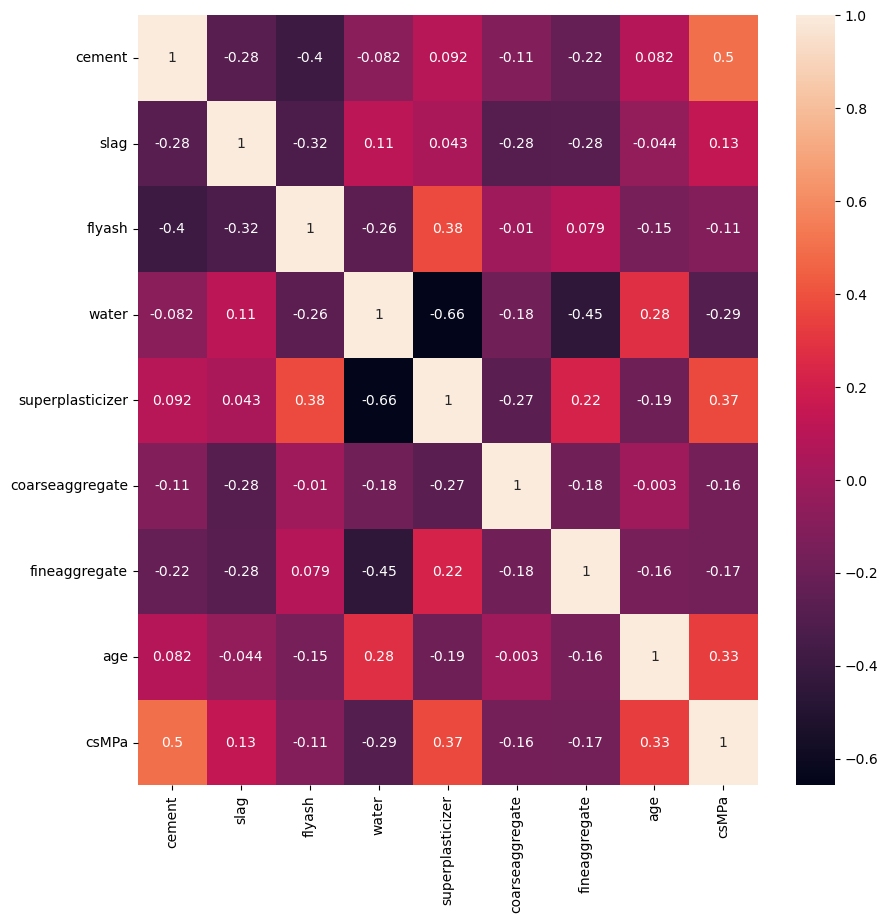

In [26]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(concrete_data_corr, annot=True)

In [27]:
X = concrete_data.drop('csMPa', axis=1)
Y = concrete_data['csMPa']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

### Bagging vs Pasting

Source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html, https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html, https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Pasting and using Decision Tree Regressor

In [29]:
bag_reg = BaggingRegressor(DecisionTreeRegressor(), n_estimators = 500, bootstrap = False, max_samples = 1.0, n_jobs = -1)

In [30]:
bag_reg.fit(x_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), bootstrap=False,
                 n_estimators=500, n_jobs=-1)

In [31]:
y_pred = bag_reg.predict(x_test)
r2_score(y_test, y_pred)

0.8886102728728564

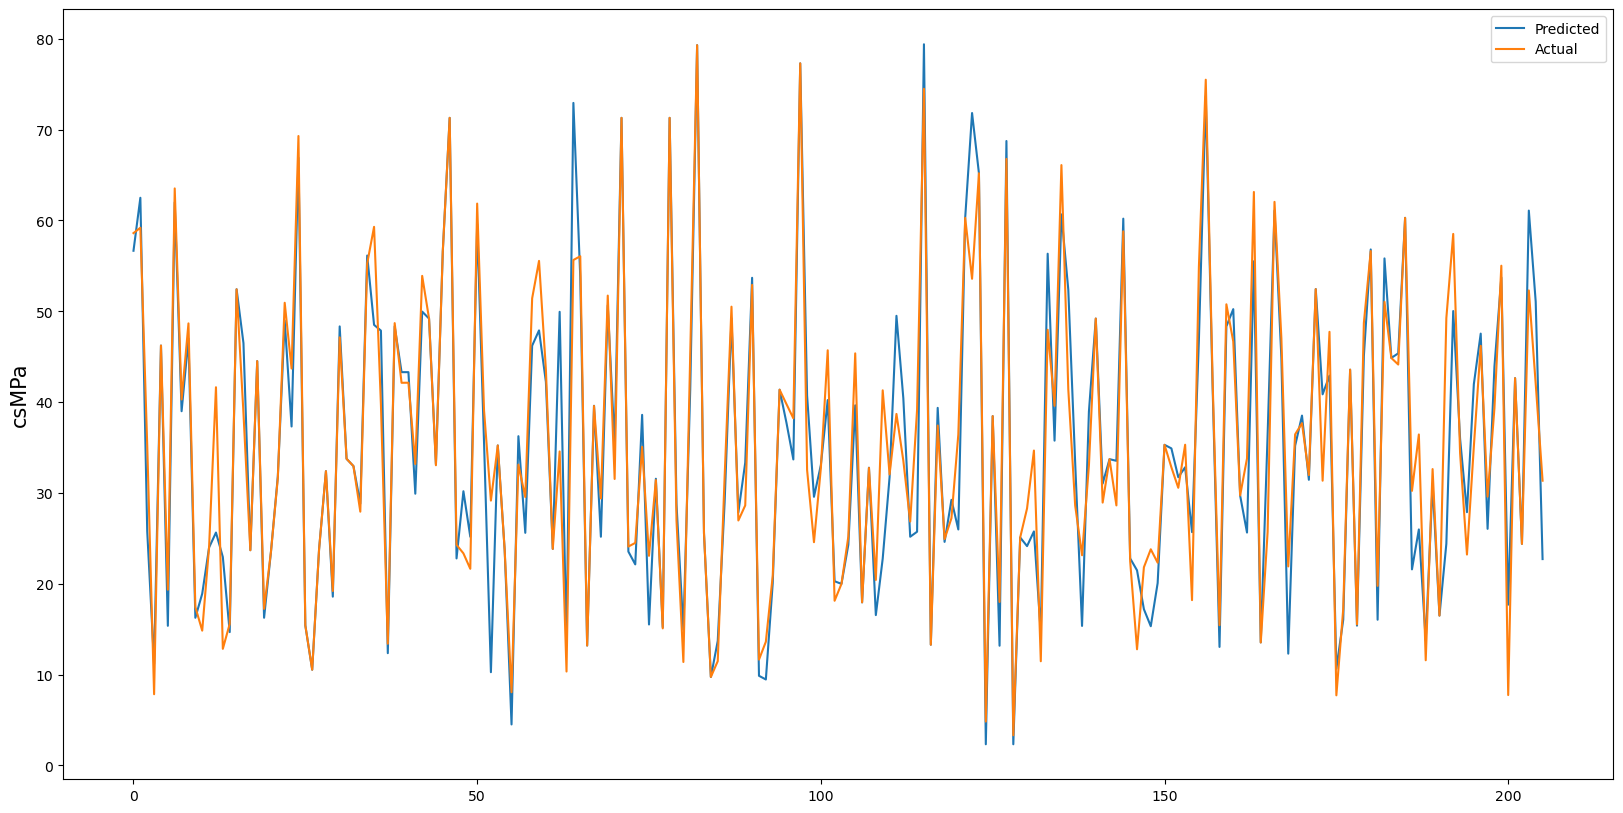

In [32]:
plt.figure(figsize = (20, 10))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('csMPa', fontsize=15)

plt.legend()
plt.show()

Bagging and using Decision Tree Regressor

In [33]:
bag_reg = BaggingRegressor(DecisionTreeRegressor(), n_estimators = 500, bootstrap = True, max_samples = 0.8, n_jobs = -1, oob_score = True)
bag_reg.fit(x_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), max_samples=0.8,
                 n_estimators=500, n_jobs=-1, oob_score=True)

In [34]:
y_pred = bag_reg.predict(x_test)
r2_score(y_test, y_pred)

0.9363323733381381

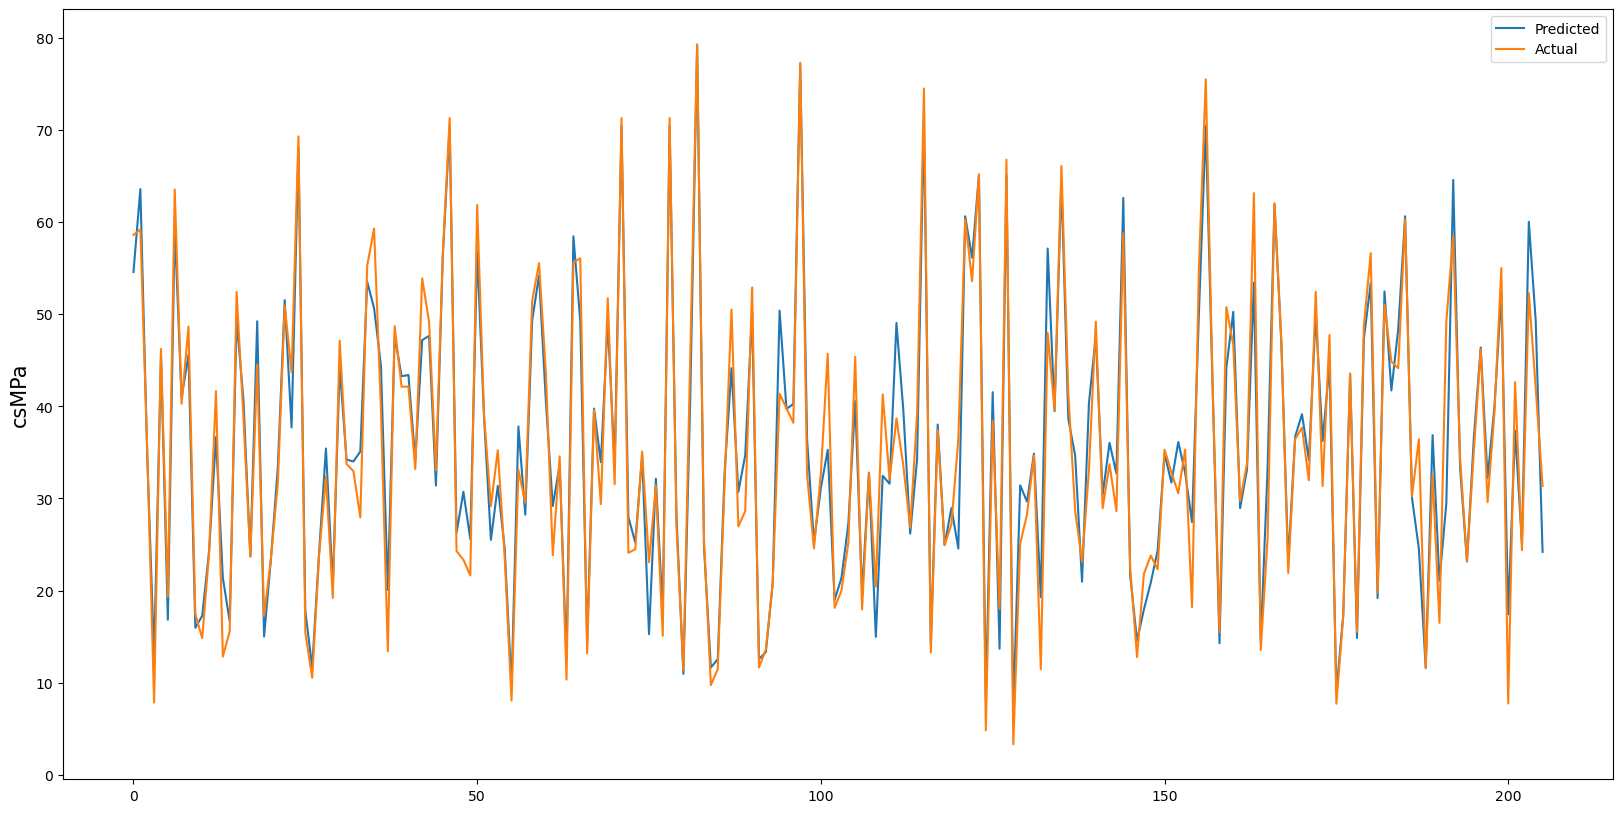

In [35]:
plt.figure(figsize = (20, 10))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('csMPa', fontsize=15)

plt.legend()
plt.show()

### Exploring Bank Dataset

In [36]:
bank_data = pd.read_csv('datasets/bank_data_processed.csv')
bank_data.head()

,Age,Income,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,34,180,1,3,0,0,0,0,0
1,38,130,4,3,134,0,0,0,0
2,46,193,2,3,0,0,0,0,0
3,38,119,1,2,0,0,1,1,1
4,42,141,3,3,0,1,1,1,0


In [37]:
X = bank_data.drop('CreditCard', axis=1)
Y = bank_data['CreditCard']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

Pasting and using Decision Tree Classifier

In [39]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 500, bootstrap = False, max_samples = 1.0, n_jobs = -1)

In [40]:
bag_clf.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=False,
                  n_estimators=500, n_jobs=-1)

In [41]:
y_pred = bag_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.7604166666666666

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        72
           1       0.52      0.67      0.58        24

    accuracy                           0.76        96
   macro avg       0.70      0.73      0.71        96
weighted avg       0.79      0.76      0.77        96



Bagging and using Decision Tree Classifier

In [43]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 500, bootstrap = True, max_samples = 1.0, n_jobs = -1, oob_score = True)
bag_clf.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500,
                  n_jobs=-1, oob_score=True)

In [44]:
y_pred = bag_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.8125

In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        72
           1       0.64      0.58      0.61        24

    accuracy                           0.81        96
   macro avg       0.75      0.74      0.74        96
weighted avg       0.81      0.81      0.81        96



# Part III

### Exploring Concrete Dataset

In [46]:
concrete = pd.read_csv('datasets/concrete_data.csv')
concrete.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [47]:
X = concrete.drop('csMPa', axis=1)
Y = concrete['csMPa']

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

### Using Random Forest Regressor

In [49]:
rnd_reg = RandomForestRegressor(n_estimators=600, max_leaf_nodes=12, n_jobs=-1)
rnd_reg.fit(x_train, y_train)

RandomForestRegressor(max_leaf_nodes=12, n_estimators=600, n_jobs=-1)

In [50]:
y_pred = rnd_reg.predict(x_test)
r2_score(y_test, y_pred)

0.80141583463844

### BaggingRegressor + DecisionTreeRegressor(with splitter='random') = RandomForestRegressor

In [51]:
bag_reg = BaggingRegressor(DecisionTreeRegressor(splitter='random', max_leaf_nodes=12), n_estimators=600, bootstrap=True, max_samples=1.0, n_jobs=-1)
bag_reg.fit(x_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_leaf_nodes=12,
                                                      splitter='random'),
                 n_estimators=600, n_jobs=-1)

In [52]:
y_pred = bag_reg.predict(x_test)
r2_score(y_test, y_pred)

0.7232990493127747

### Exploring Concrete Dataset

In [53]:
bank_data = pd.read_csv('datasets/bank_data_processed.csv')
bank_data.head()

,Age,Income,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,34,180,1,3,0,0,0,0,0
1,38,130,4,3,134,0,0,0,0
2,46,193,2,3,0,0,0,0,0
3,38,119,1,2,0,0,1,1,1
4,42,141,3,3,0,1,1,1,0


In [54]:
X = bank_data.drop('CreditCard', axis=1)
Y = bank_data['CreditCard']

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

### Using Random Forest Classifier

In [56]:
rnd_clf = RandomForestClassifier(n_estimators = 400, max_leaf_nodes = 16, n_jobs = -1)
rnd_clf.fit(x_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=400, n_jobs=-1)

In [57]:
y_pred = rnd_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.7604166666666666

#### BaggingRegressor + DecisionTreeClassifier(with splitter='random') = RandomForestClassifier

In [58]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(splitter ='random', max_leaf_nodes=12), 
                                                   n_estimators = 400, 
                                                   max_samples = 1.0,
                                                   bootstrap = True,
                                                   n_jobs = -1)

bag_clf.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_leaf_nodes=12,
                                                        splitter='random'),
                  n_estimators=400, n_jobs=-1)

In [59]:
y_pred = bag_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.7916666666666666

# Part IV

https://towardsdatascience.com/boosting-algorithms-explained-d38f56ef3f30

### Exploring Concrete Dataset

In [60]:
concrete = pd.read_csv('datasets/concrete_data.csv')
concrete.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [61]:
X = concrete.drop('csMPa', axis=1)
Y = concrete['csMPa']

In [62]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

### AdaBoosting (Regression)

Source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html, https://en.wikipedia.org/wiki/AdaBoost, https://en.wikipedia.org/wiki/AdaBoost

In [63]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=100, learning_rate=1.0)
ada_reg.fit(x_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=100)

In [64]:
y_pred = ada_reg.predict(x_test)

In [65]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8312206238520152

### Exploring Bank Dataset

In [66]:
bank_data = pd.read_csv('datasets/bank_data_processed.csv')
bank_data.head()

,Age,Income,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,34,180,1,3,0,0,0,0,0
1,38,130,4,3,134,0,0,0,0
2,46,193,2,3,0,0,0,0,0
3,38,119,1,2,0,0,1,1,1
4,42,141,3,3,0,1,1,1,0


In [67]:
X = bank_data.drop('CreditCard', axis=1)
Y = bank_data['CreditCard']

In [68]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

### AdaBoosting (Classification)

Source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html, https://en.wikipedia.org/wiki/AdaBoost, https://en.wikipedia.org/wiki/AdaBoost

In [69]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=100, algorithm='SAMME', learning_rate=1.0)
ada_clf.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100)

In [70]:
y_pred = ada_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.8020833333333334

### Exploring Concrete Dataset

In [71]:
concrete = pd.read_csv('datasets/concrete_data.csv')
concrete.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [72]:
X = concrete.drop('csMPa', axis=1)
Y = concrete['csMPa']

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

### Demonstrating "Naive" Gradient Boosting

In [74]:
tree_reg1 = DecisionTreeRegressor(max_depth=5)
tree_reg1.fit(x_train, y_train)

y_pred = sum(tree.predict(x_test) for tree in (tree_reg1, ))

print("iter 1: " + str(r2_score(y_test, y_pred)))

y2 = y_train - tree_reg1.predict(x_train)

tree_reg2 = DecisionTreeRegressor(max_depth=5)
tree_reg2.fit(x_train, y2)

y_pred = sum(tree.predict(x_test) for tree in (tree_reg1, tree_reg2))

print("iter 2: " + str(r2_score(y_test, y_pred)))

y3 = y2 - tree_reg2.predict(x_train)

tree_reg3 = DecisionTreeRegressor(max_depth=5)
tree_reg3.fit(x_train, y3)

y_pred = sum(tree.predict(x_test) for tree in (tree_reg1, tree_reg2, tree_reg3))

print("iter 3: " + str(r2_score(y_test, y_pred)))

y4 = y3 - tree_reg3.predict(x_train)

tree_reg4 = DecisionTreeRegressor(max_depth=5)
tree_reg4.fit(x_train, y4)

y_pred = sum(tree.predict(x_test) for tree in (tree_reg1, tree_reg2, tree_reg3, tree_reg4))

print("iter 4: " + str(r2_score(y_test, y_pred)))

iter 1: 0.6824416703862703
iter 2: 0.6527428301537543
iter 3: 0.6774821903198163
iter 4: 0.734823596995662


### sklearn's Gradient Boosting

Source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

In [75]:
gbr = GradientBoostingRegressor(max_depth=3, n_estimators=3, learning_rate=1.0)
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)
r2_score(y_test, y_pred)

0.6843737022454911

In [76]:
gbr = GradientBoostingRegressor(max_depth=3, n_estimators=30, learning_rate=0.1)
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)
r2_score(y_test, y_pred)

0.8221657531464523